In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import altair
import seaborn
RANDOM_SEED = 511
rng = np.random.default_rng(RANDOM_SEED)
seaborn.set_theme(style="darkgrid")
altair.renderers.enable('mimetype')
db_url = os.getenv('DB_URL')

In [2]:
%load_ext autoreload
%autoreload 2
from lib import adjust_pairplot_axes

In [3]:

sql = """
select 
    zip_code,
    neighborhood_name,
    borough_name,
    CASE WHEN is_harlem THEN 'Harlem' ELSE 'Rest of NYC' END AS is_harlem,

    avg_daily_enrollment_2010 AS "Daily Avg OTP Enrollment (2010)",
    avg_daily_enrollment_2010::FLOAT / (SUM(avg_daily_enrollment_2010) OVER ())
        AS "Fraction of Daily Avg OTP Enrollment (2010)",

    avg_daily_enrollment_2015 AS "Daily Avg OTP Enrollment (2015)",
    avg_daily_enrollment_2015::FLOAT / (SUM(avg_daily_enrollment_2015) OVER ())
        AS "Fraction of Daily Avg OTP Enrollment (2015)",

    avg_daily_enrollment_2019 AS "Daily Avg OTP Enrollment (2019)",
    avg_daily_enrollment_2019::FLOAT / (SUM(avg_daily_enrollment_2019) OVER ())
        AS "Fraction of Daily Avg OTP Enrollment (2019)",
    
    total_admissions_3_2019 AS "OTP Admissions (2019)",
    total_admissions_3_2019::FLOAT / (SUM(total_admissions_3_2019) OVER ())
        AS "Fraction of OTP Admissions (2019)",

    current_certified_capacity AS "OTP Capacity (2019)",
    current_certified_capacity::FLOAT / (SUM(current_certified_capacity) OVER ())
        AS "Fraction of OTP Capacity (2019)",

    patient_admissions_3_2019 AS "Estimated OTP Patients (2019)",
    patient_admissions_3_2019::FLOAT / (SUM(patient_admissions_3_2019) OVER ())
        AS "Estimated Fraction of OTP Patients (2019)"
    
from zip_code_analysis
where program_category = 'Opioid Treatment Program'
    and NOT is_outside_nyc
"""
zip_df = pd.read_sql(sql, con=db_url)

for c in [
    'zip_code',
    'neighborhood_name',
    'borough_name',
    'is_harlem'
]:
    zip_df[c] = pd.Categorical(zip_df[c])

zip_df = zip_df.set_index('zip_code')
zip_df.head(3).T


zip_code,11203,11206,10019
neighborhood_name,Flatbush,Bushwick and Williamsburg,Chelsea and Clinton
borough_name,Brooklyn,Brooklyn,Manhattan
is_harlem,Rest of NYC,Rest of NYC,Rest of NYC
Daily Avg OTP Enrollment (2010),869.0,499.0,259.0
Fraction of Daily Avg OTP Enrollment (2010),0.025736,0.014778,0.00767
Daily Avg OTP Enrollment (2015),595.0,563.0,318.0
Fraction of Daily Avg OTP Enrollment (2015),0.016961,0.016049,0.009065
Daily Avg OTP Enrollment (2019),517.0,510.0,291.0
Fraction of Daily Avg OTP Enrollment (2019),0.017732,0.017492,0.00998
OTP Admissions (2019),198.0,196.0,239.0


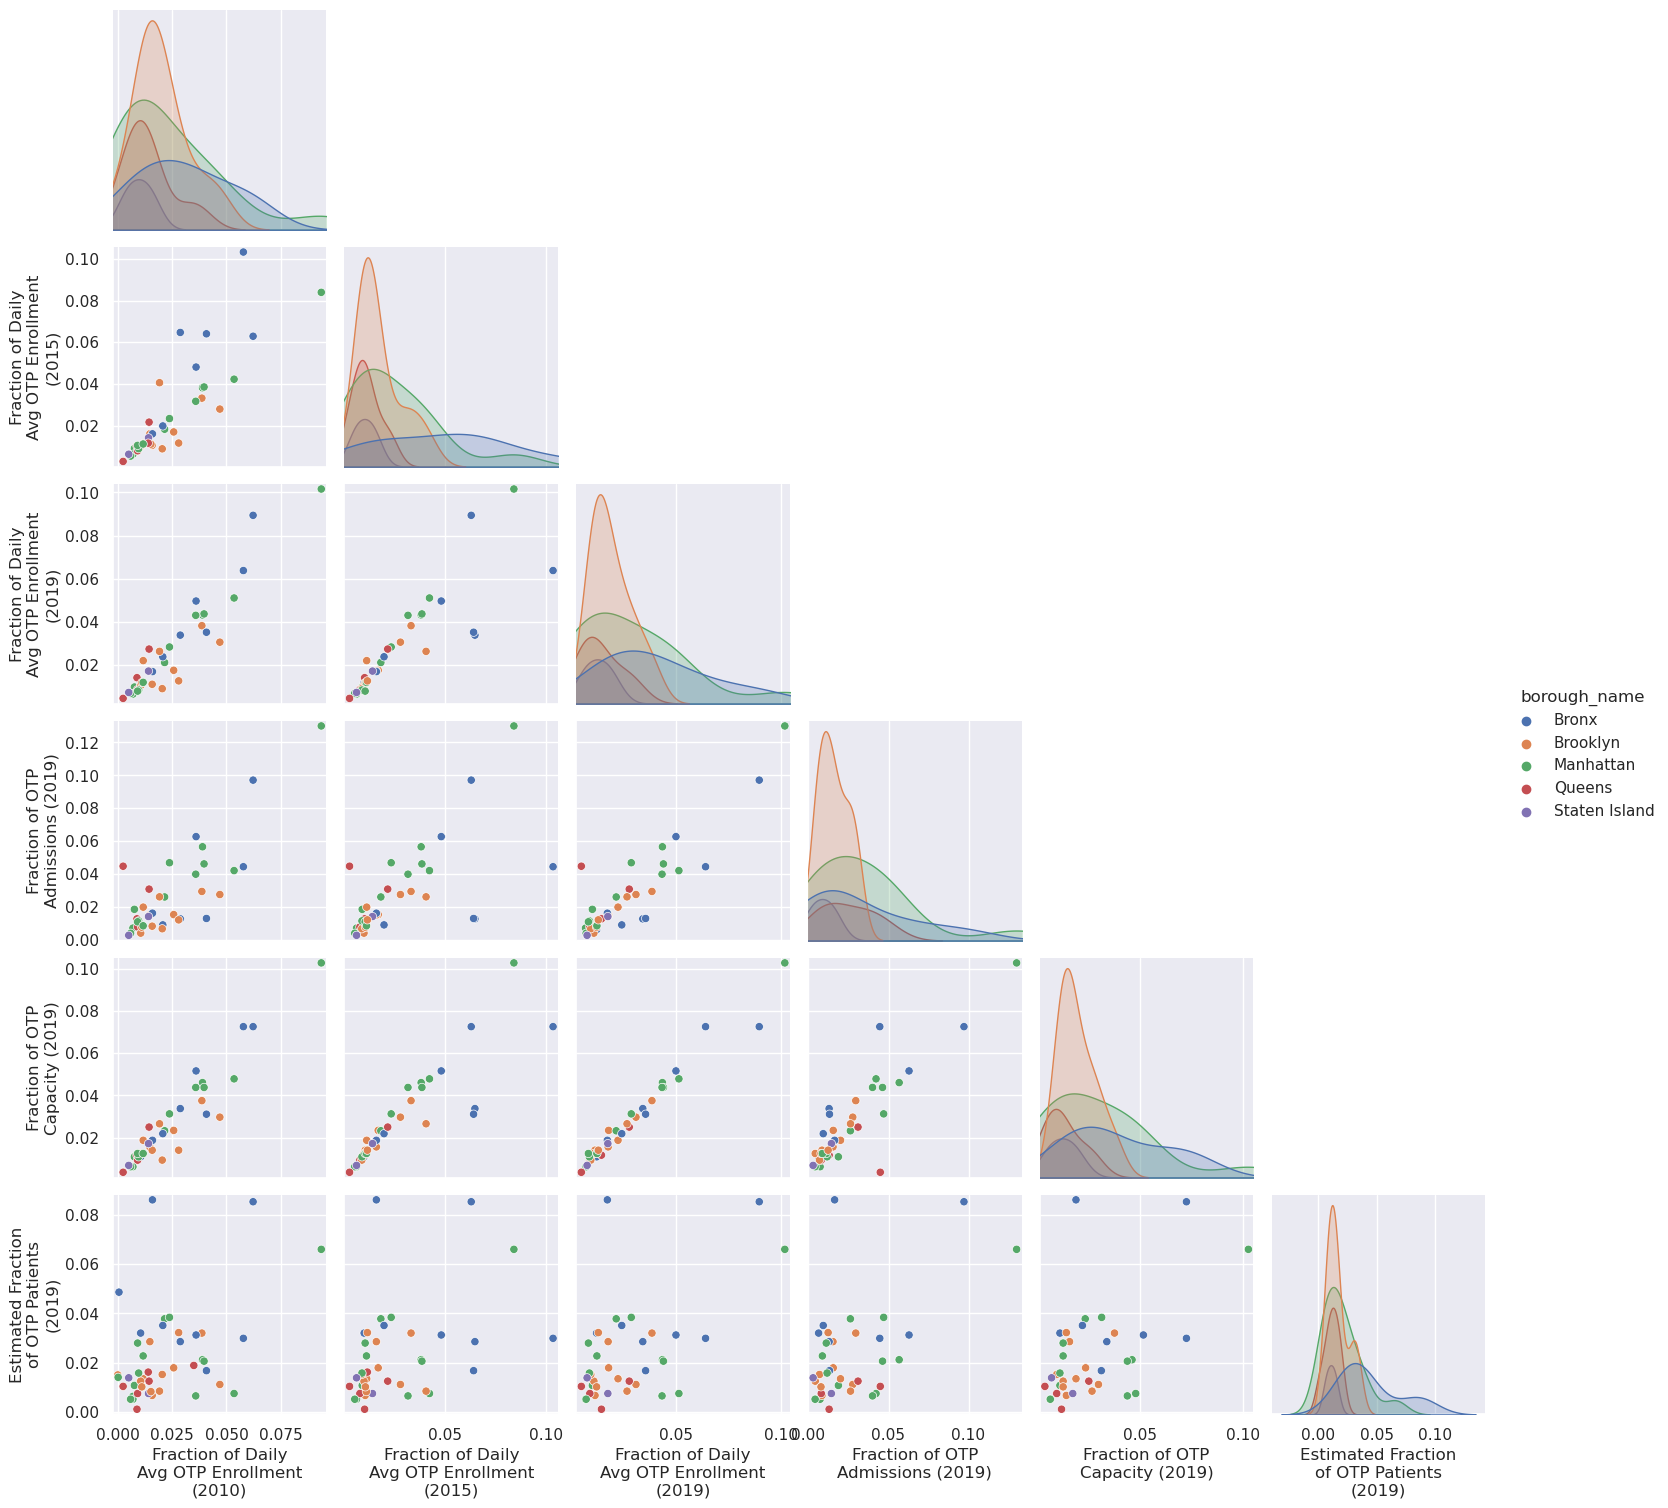

In [4]:
measures = [c for c in zip_df.columns if 'Fraction' in c]
p = seaborn.pairplot(
    zip_df[['borough_name'] + measures], 
    hue='borough_name',
    corner=True
);

adjust_pairplot_axes(zip_df, measures, p)

In [5]:
by_borough = (zip_df
    .drop(columns=['is_harlem', 'neighborhood_name'])
    .groupby('borough_name')
    .sum()
)
by_borough

,Daily Avg OTP Enrollment (2010),Fraction of Daily Avg OTP Enrollment (2010),Daily Avg OTP Enrollment (2015),Fraction of Daily Avg OTP Enrollment (2015),Daily Avg OTP Enrollment (2019),Fraction of Daily Avg OTP Enrollment (2019),OTP Admissions (2019),Fraction of OTP Admissions (2019),OTP Capacity (2019),Fraction of OTP Capacity (2019),Estimated OTP Patients (2019),Estimated Fraction of OTP Patients (2019)
borough_name,,,,,,,,,,,,
Bronx,9230.0,0.273352,13644.0,0.388928,9489.0,0.325445,3358.0,0.262426,10015.0,0.313380,2040,0.393519
Brooklyn,8723.0,0.258337,7324.0,0.208774,6093.0,0.208972,2225.0,0.173882,6850.0,0.214344,1099,0.211998
Manhattan,12330.0,0.365160,11493.0,0.327613,11237.0,0.385396,5756.0,0.449828,12732.0,0.398398,1588,0.306327
Queens,2834.0,0.083931,1904.0,0.054274,1614.0,0.055355,1237.0,0.096671,1591.0,0.049784,346,0.066744
Staten Island,649.0,0.019221,716.0,0.020410,724.0,0.024831,220.0,0.017193,770.0,0.024094,111,0.021412


''

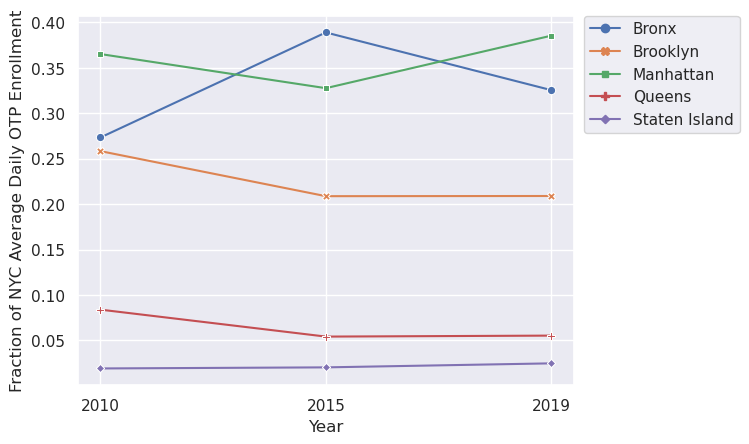

In [6]:
yrs = ('2010', '2015', '2019')

fractional_enrollment_over_time_by_borough = (
    by_borough[[f'Fraction of Daily Avg OTP Enrollment ({yr})' for yr in yrs]]
        .rename(columns={
            f'Fraction of Daily Avg OTP Enrollment ({yr})': yr
            for yr in yrs
        })
        .T
)
ax = seaborn.lineplot(
    data=fractional_enrollment_over_time_by_borough, 
    markers=True, dashes=False,
    
)
ax.set_xlabel('Year')
ax.set_ylabel('Fraction of NYC Average Daily OTP Enrollment')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
;

In [7]:
yrs = ('2010', '2015', '2019')

enrollment_over_time_by_borough = (
    by_borough[[f'Daily Avg OTP Enrollment ({yr})' for yr in yrs]]
        .rename(columns={
            f'Daily Avg OTP Enrollment ({yr})': yr
            for yr in yrs
        })
        .T
)
enrollment_over_time_by_borough_long = enrollment_over_time_by_borough.unstack().reset_index()
enrollment_over_time_by_borough_long = enrollment_over_time_by_borough_long.rename(columns={
    'borough_name': 'Borough Name',
    enrollment_over_time_by_borough_long.columns[1]: 'Year',
    enrollment_over_time_by_borough_long.columns[2]: 'Avg Daily Enrollment'
})

(altair.Chart(enrollment_over_time_by_borough_long)
    .properties(width=550)
    .mark_line(point=altair.OverlayMarkDef())
    .encode(
        x='Year',
        y='Avg Daily Enrollment',
        color='Borough Name',
        tooltip=list(enrollment_over_time_by_borough_long.columns)
    )
    .interactive()
)

/home/skritch/miniconda3/envs/harlem/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


## Capacity vs Overdose Deaths, by year

In [8]:

sql = """
with enrollment as (
    select
        p.borough_name,
        c.year,
        SUM(c.avg_daily_enrollment) AS enrollment
    from chan_foil c
        join programs as p using (program_number)
    group by 1, 2
)
select
    borough_name,
    year,
    enrollment AS "OTP Enrollment",
    ny_county_od_trend.deaths AS "Opioid Overdose Deaths",
    rate_per_100k AS "Opioid Overdose Deaths/100k",
    100000 * enrollment / total_population AS "OTP Enrollment/100k"
from enrollment AS e
    full outer join ny_county_od_trend using (borough_name, year)
where ny_county_od_trend.is_nyc
order by 1, 2
"""
borough_df = pd.read_sql(sql, con=db_url)

for c in ['borough_name']:
    borough_df[c] = pd.Categorical(borough_df[c])

borough_df.head(7)

,borough_name,year,OTP Enrollment,Opioid Overdose Deaths,Opioid Overdose Deaths/100k,OTP Enrollment/100k
0,Bronx,2010,14731.0,71,5.1,1062.0
1,Bronx,2011,NaN,93,6.7,NaN
2,Bronx,2012,NaN,109,7.7,NaN
3,Bronx,2013,NaN,105,7.4,NaN
4,Bronx,2014,NaN,102,7.1,NaN
5,Bronx,2015,18286.0,175,12.2,1270.0
6,Bronx,2016,NaN,266,18.4,NaN


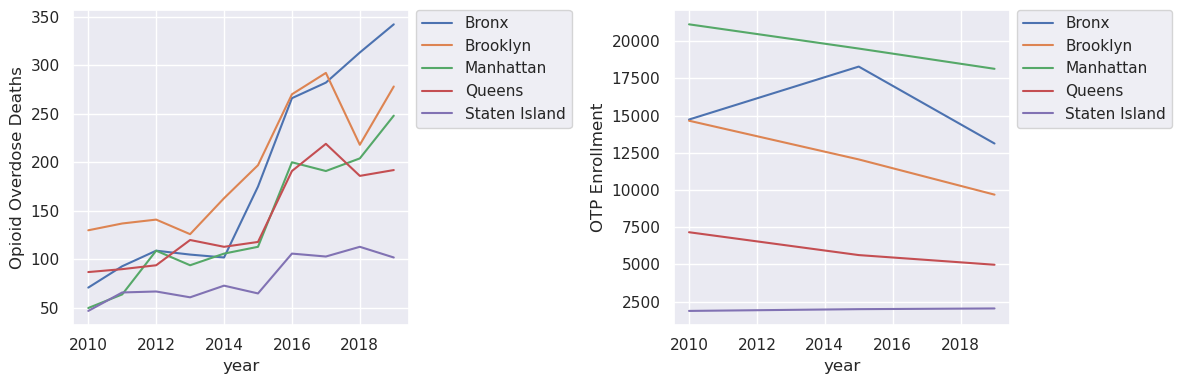

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
seaborn.lineplot(
    borough_df,
    x='year',
    y='Opioid Overdose Deaths',
    hue='borough_name',
    ax=ax1
)
ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
seaborn.lineplot(
    borough_df[~borough_df['OTP Enrollment'].isnull()],
    x='year',
    y='OTP Enrollment',
    hue='borough_name',
    ax=ax2
)
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()

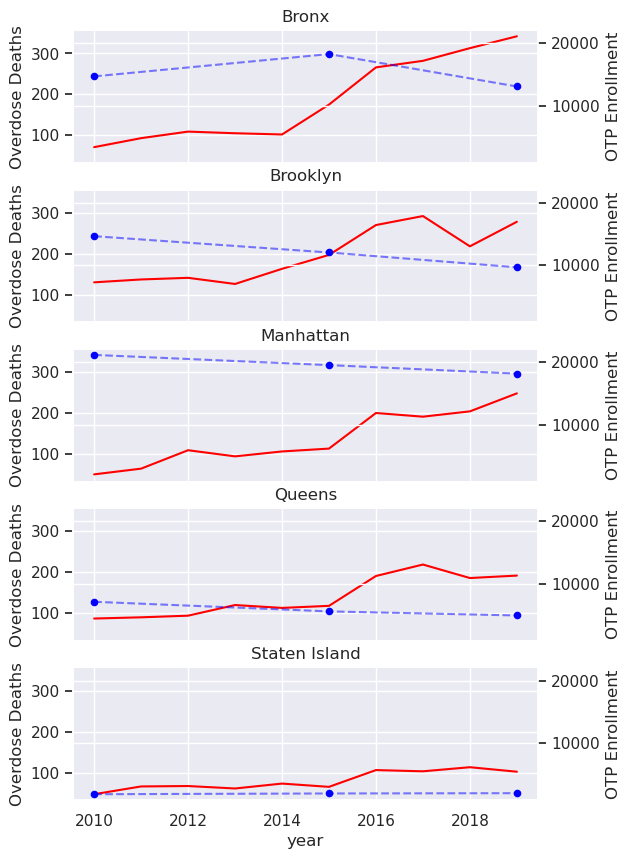

In [10]:
boroughs = list(borough_df['borough_name'].unique())
fig, axes = plt.subplots(len(boroughs), 1, sharex=True, sharey=True, figsize=(6, 10))
axes2 = [ax.twinx() for ax in axes]
axes2[0].get_shared_y_axes().join(*axes2)
for (i, (b, ax1, ax2)) in enumerate(zip(boroughs, axes, axes2)):
    borough = borough_df[borough_df['borough_name'] == b]
    borough.plot(kind='line', x='year', y='Opioid Overdose Deaths', ax=ax1, color='red', legend=False)
    borough[~borough['OTP Enrollment'].isnull()].plot(
        kind='line', x='year', y='OTP Enrollment', ax=ax2, color='blue', style='--', alpha=0.5, legend=False)
    borough.plot(kind='scatter', x='year', y='OTP Enrollment', ax=ax2, color='blue', legend=False)
    ax1.set_ylabel('Overdose Deaths')
    ax1.set_title(b)
    # if i != len(boroughs) - 1:
    #     ax2.set_ylabel(None)